#**Pregunta 1:**
¿Qué es una clase y por qué es útil?
Define una clase con un ejemplo, dando todas sus características.

Una clase es una tipo plantilla a partir de la cual vamos a poder crear objetos y definir características de alguna otra entidad. Es útil porque es capaz de almacenar mucha información como lo pueden ser las definiciones y es más fácil guardar todas estas ahí que tener que hacer una por una.


In [ ]:
#Ejemplo de una clase
class Animal():
  def __init__(self,raza): #es la definición que va a iniciar la clase
    self.raza=raza #como le pusimos que tuviera otra variable, tenemos que definirla abajo.
    print("Clase creada") #te regresa un mensaje de que la clase ha sido creada
  def raza(self): #otra definición dentro de la clase
   return self.raza

#**Pregunta 2:**

En Python, un **constructor** es un método especial que se llama automáticamente cuando se crea un objeto. Se utiliza para inicializar los atributos del objeto y realizar cualquier tarea de configuración necesaria antes de su uso. \\

Para este ejercicio contesta las siguientes preguntas:


1.   ¿Cuál es la sintaxis para definir un constructor dentro de una clase?
2.   Considera el siguiente código: \\

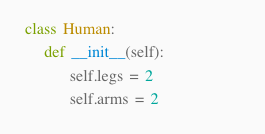

\\
La clase 'Human' tiene un constructor que toma dos parametros, ¿cuáles son?



In [ ]:
#1) Sintaxis
#La forma de definir un constructor dentro de una clase es con el __init__(self). Se escribe def porque es una definición, luego __init__ porque es lo que inicializa la clase
#y luego el self porque autoasgina una variable


In [ ]:
#2) ¿Cuáles son los dos parámetros que toma el constructor?
# legs y arms son los dos parámetros de la clase Human.

In [ ]:
#3) "Crea dos atributos asociados a la clase Human"
class Human:
  def __init__(self):
    self.legs=2
    self.arms=2
  def arms(self):
    return "Tengo " + self.arms + "brazos"
  def legs(self):
    print( f"Tengo {self.legs} piernas")

#**Pregunta 3:**

Indica si las siguientes afirmaciones son verdaderas o falsas:



*   El primer parámetro del método '__ init() __' es siempre 'self' , que se refiere a la instancia de la clase que se está creando. Se pasa automáticamente al constructor cuando se instancia el objeto. **Verdadero. Para crear una clase siempre se pone (self) como primera variable dentro del inicialzador.**
*   Después de 'self', puedes definir cualquier otro parámetro necesario para inicializar los atributos del objeto. **Verdadero. Después de self, puedes ponerle a la definición que te pida lo que quieras, como pueden ser fechas o tickers si estamos haciendo una definición para alguna acción por ejemplo.**
*   Cuando añades la función __ init ()  __ , la clase heredada ya no hereda la función  __ init () __  de la clase madre. **Verdadero. Si quieres que la clase heredada herede la función __init__ de la clase madre, tiene que ser con otra función diferente a __init__. EL nuevo __init__ va a reemplazar al de la clase madre.**
*   En la programación orientada a objetos, las clases pueden heredar atributos y métodos de otras clases. **Verdadero. Se puede hacer que una clase sea una clase heredada de otra y así puede heredar los atributos y métodos de la llamada clase madre.**
*  Cuando hablamos de polimorfismos en Python, diferentes clases pueden ser tratadas como instancias de la misma superclase, independientemente de cómo implementen el mismo método. **Verdadero. Esto pasa siempre y cuando usen el mismo método. **

---

#**Pregunta 4:**
A partir de un diccionario, crea un DataFrame (que llamarás **precios_muestra**) que consista de dos columnas y que tenga 12 valores **flotantes** que eligirás de manera aleatoria en el intervalo (8,13). Etiqueta del 1 al 12 y llama a la columna de etiquetas Mes.

1.- Construye una función que calcule los rendimientos simples de cada columna.

2.- Las desviaciones estadísticas de los rendimientos ayudan a calcular la volatilidad del portafolio:
$$\text{desviaciones}=(\text{rendimientos}-\text{media}(\text{rendimientos}))^2.$$
Crea una función que calcule la media de las desviaciones y luego la volatilidad de tu portafolio (raíz cuadrada de la media de las desviaciones).

3.- Anualizamos la volatilidad escalándola (multiplicándola) por la raíz cuadrada del número de períodos por observación.

Por lo tanto, para anualizar la volatilidad de una serie mensual, la multiplicamos por la raíz cuadrada de 12. Muestra la serie de la volatilidad anualizada.

4.- Realiza una gráfica de barras para los rendimientos y una gráfica en líneas para los precios.

5.- Calcula los rendimientos compuestos para cada columna y después anualiza los rendimientos.

---

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import yfinance as yf


In [ ]:
p={"Mes":list(range(1,13)),
   "Precios":[np.random.uniform(8,13)for i in range (12)]} #diccionario que crea la lista de los 12 meses y los precios aleatorios entre 8 y 13

In [ ]:
precios_muestra=pd.DataFrame(p)
precios_muestra #pasamos el diccionario a un data frame

,Mes,Precios
0,1,9.663819
1,2,11.711001
2,3,12.381326
3,4,9.050848
4,5,9.605604
5,6,12.522168
6,7,12.592245
7,8,8.583350
8,9,9.065075
9,10,8.262664


In [ ]:
rend=precios_muestra["Precios"].pct_change().dropna() #función que calcula los rendimientos de cada mes tirando la primera fila que es un dato no calculable.
rend

1     0.211840
2     0.057239
3    -0.268992
4     0.061293
5     0.303632
6     0.005596
7    -0.318362
8     0.056123
9    -0.088517
10    0.467842
11   -0.064547
Name: Precios, dtype: float64

In [ ]:
media=rend.mean()

In [ ]:
#Sacamos la desviación estándar de los rendimientos
desviaciones=(rend-media)**2
desviaciones

1     0.030058
2     0.000352
3     0.094532
4     0.000521
5     0.070312
6     0.001081
7     0.127328
8     0.000312
9     0.016125
10    0.184362
11    0.010612
Name: Precios, dtype: float64

In [ ]:
std= desviaciones.mean()
std

0.04869031959175798

In [ ]:
vol=std*(1/12)
vol #anualizamos la volatilidad multiplicando por la raíz del número de periodos

0.004057526632646498

<Axes: >

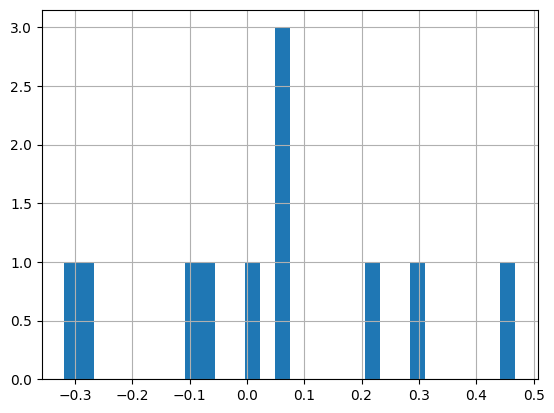

In [ ]:
rend.hist(bins=30)
#graficamos en histogramas los rendimientos

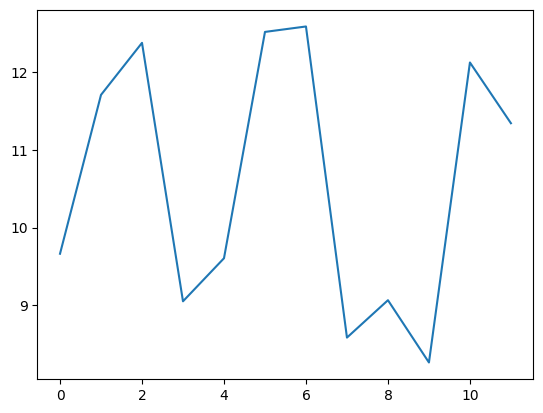

In [ ]:
precios_muestra["Precios"].plot(label="precio");
#graficamos los precios con una gráfica de líneas

In [ ]:
rend_comp=precios_muestra["Precios"].pct_change().dropna()+1 #rendimientos compuestos
rend_comp*(1/12) #rendimientos compuestos anualizados

1     0.100987
2     0.088103
3     0.060917
4     0.088441
5     0.108636
6     0.083800
7     0.056803
8     0.088010
9     0.075957
10    0.122320
11    0.077954
Name: Precios, dtype: float64

#**Pregunta 5:**
Carga dos tickers y realiza los pasos del ejercicio anterior usando los tickers que elijas. Recuerda tomar en cuenta la ventana de tiempo que manejarás. Realiza un análisis estadístico (estadística descriptiva, histogramas y gráficas de series de tiempo).

In [ ]:
fecha_inicial= "2021-12-31"
fecha_final= "2023-01-01"

In [ ]:
amazon=yf.download("AMZN", fecha_inicial,fecha_final)
tesla=yf.download("TSLA", fecha_inicial, fecha_final)
#descargamos los dos tickers desde yahoo finance

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
tickers=["AMZN","TSLA"]
datos=yf.download(tickers,fecha_inicial,fecha_final)["Close"]
datos
#creamos una lista llamada tickers para guardar todos los tickers descargados y después lo guardamos en un data frame

[*********************100%%**********************]  2 of 2 completed


,AMZN,TSLA
Date,,
2021-12-31,166.716995,352.260010
2022-01-03,170.404495,399.926666
2022-01-04,167.522003,383.196655
2022-01-05,164.356995,362.706665
2022-01-06,163.253998,354.899994
...,...,...
2022-12-23,85.250000,123.150002
2022-12-27,83.040001,109.099998
2022-12-28,81.820000,112.709999


In [ ]:
rend1=datos.pct_change().dropna()
rend1
#calculamos los rendimientos diarios de los dos tickers tirando la primera fila que no se puede calcular

,AMZN,TSLA
Date,,
2022-01-03,0.022118,0.135317
2022-01-04,-0.016916,-0.041833
2022-01-05,-0.018893,-0.053471
2022-01-06,-0.006711,-0.021523
2022-01-07,-0.004288,-0.035447
...,...,...
2022-12-23,0.017425,-0.017551
2022-12-27,-0.025924,-0.114089
2022-12-28,-0.014692,0.033089


In [ ]:
media1=rend1.mean() #calculamos la media de los rendimientos

In [ ]:
desviaciones1=(rend1-media1)**2
desviaciones1
#Sacamos la desviación estándar de los rendimientos

,AMZN,TSLA
Date,,
2022-01-03,5.929253e-04,0.019213
2022-01-04,2.156154e-04,0.001485
2022-01-05,2.776007e-04,0.002518
2022-01-06,2.006363e-05,0.000332
2022-01-07,4.227304e-06,0.001034
...,...,...
2022-12-23,3.863678e-04,0.000203
2022-12-27,5.613111e-04,0.012276
2022-12-28,1.552514e-04,0.001324


In [ ]:
std1=desviaciones1.mean()
std1
#le sacamos la media a las desviaciones estandar

AMZN    0.000991
TSLA    0.001757
dtype: float64

In [ ]:
vol= std1*(1/252)
vol
#anualizamos la volatilidad multiplicando por la raíz del número de periodos

AMZN    0.000004
TSLA    0.000007
dtype: float64

array([[<Axes: title={'center': 'AMZN'}>,
        <Axes: title={'center': 'TSLA'}>]], dtype=object)

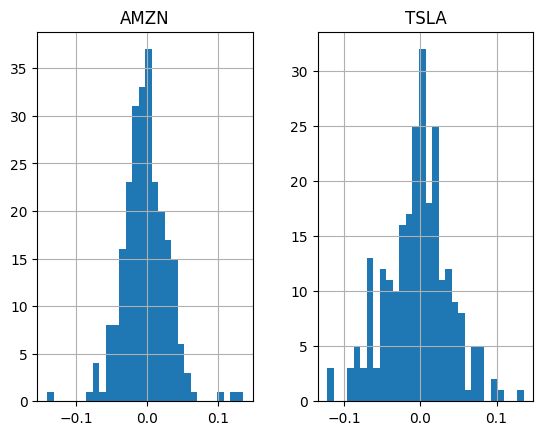

In [ ]:
rend1.hist(bins=30)
#graficamos en histogramas los rendimientos

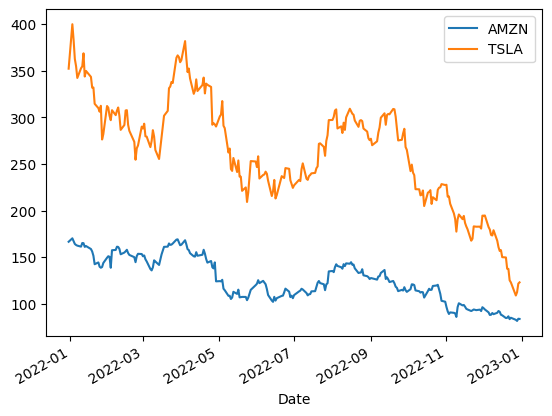

In [ ]:
datos.plot(label="precio");
#graficamos los precios con una gráfica de líneas

In [ ]:
datos.describe()

,AMZN,TSLA
count,252.000000,252.000000
mean,126.260002,263.446918
std,23.993472,57.971835
min,81.820000,109.099998
25%,108.904749,224.884995
50%,122.884998,271.975006
75%,146.259880,302.674988
max,170.404495,399.926666


Podemos observar que la media del precio de amazon es de 126.26 mientras que la de tesla es de 263.45. La desviación estándar de la acción de amazon es de 23.99 mientras que la de tesla es de 57.97